## (Deep) Gaussian Processes Prior Samples

This notebook aims at showing examples of shape of the class of functions by the different GP models

In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import gpflow.kernels as ker
import warnings
warnings.filterwarnings('ignore')

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\33617\appd

### GP Prior samples

In [9]:
KM12 = ker.Matern12(1, lengthscales = 0.5)
KM32 = ker.Matern32(1, lengthscales = 0.5)
KM52 = ker.Matern52(1, lengthscales = 0.5)
KExp = ker.RBF(1, lengthscales = 0.5)

In [3]:
X = np.linspace(-1,1,1000)[:, None]

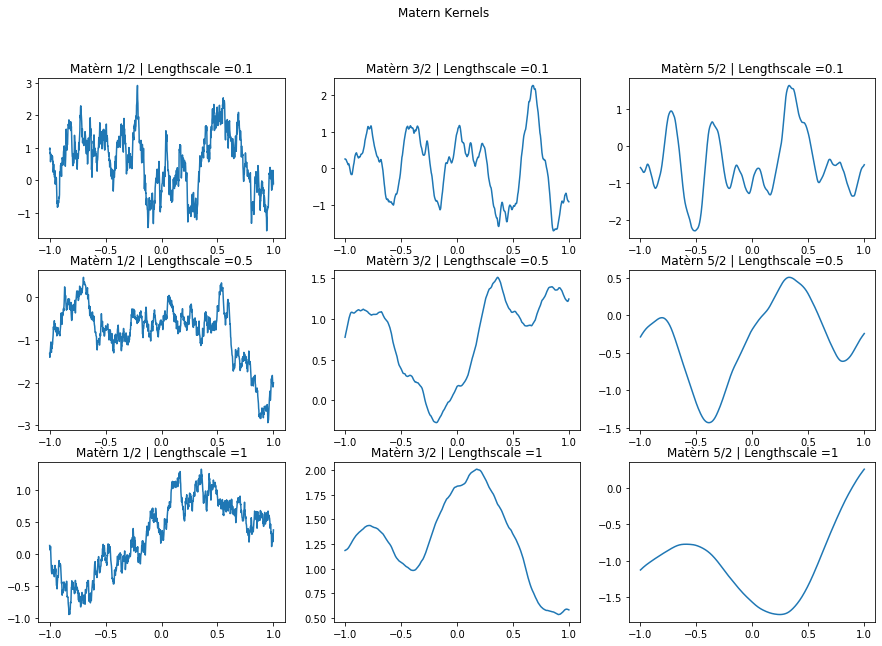

In [18]:
length_scales = [0.1,0.5,1]
fig, axs = plt.subplots(3, 3, figsize = (15,10))
fig.suptitle('Matern Kernels')
for i, l in enumerate(length_scales):
    K1 = ker.Matern12(1, lengthscales = l).compute_K_symm(X)
    K2 = ker.Matern32(1, lengthscales = l).compute_K_symm(X)
    K3 = ker.Matern52(1, lengthscales = l).compute_K_symm(X)
    Y1 = np.random.multivariate_normal(np.zeros(1000), K1)
    Y2 = np.random.multivariate_normal(np.zeros(1000), K2)
    Y3 = np.random.multivariate_normal(np.zeros(1000), K3)
    axs[i,0].plot(X, Y1)
    axs[i,0].set_title('Matèrn 1/2 | Lengthscale =' + str(l))
    axs[i,1].plot(X, Y2)
    axs[i,1].set_title('Matèrn 3/2 | Lengthscale =' + str(l))
    axs[i,2].plot(X, Y3)
    axs[i,2].set_title('Matèrn 5/2 | Lengthscale =' + str(l))
plt.savefig("MaternPriors2.pdf")

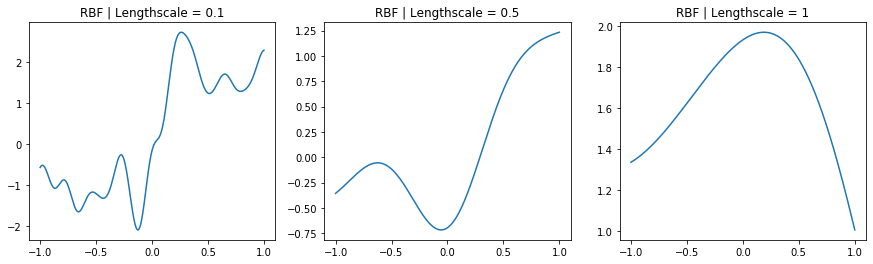

In [26]:
length_scales = [0.1,0.5,1]
fig, axs = plt.subplots(1, 3, figsize = (15,4))
K1 = ker.RBF(1, lengthscales = 0.1).compute_K_symm(X)
K2 = ker.RBF(1, lengthscales = 0.5).compute_K_symm(X)
K3 = ker.RBF(1, lengthscales = 1).compute_K_symm(X)
Y1 = np.random.multivariate_normal(np.zeros(1000), K1)
Y2 = np.random.multivariate_normal(np.zeros(1000), K2)
Y3 = np.random.multivariate_normal(np.zeros(1000), K3)
axs[0].plot(X, Y1)
axs[0].set_title('RBF | Lengthscale = 0.1')
axs[1].plot(X, Y2)
axs[1].set_title('RBF | Lengthscale = 0.5')
axs[2].plot(X, Y3)
axs[2].set_title('RBF | Lengthscale = 1')
plt.savefig("RBFPriors.pdf")

### Gaussian Process regression

In [1]:
import gpflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\33617\appd

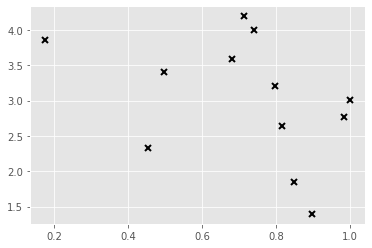

In [24]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

In [9]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.models.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01
m.compile()

W0229 14:51:20.792207 14468 deprecation_wrapper.py:119] From c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\gpflow\core\node.py:109: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0229 14:51:20.833936 14468 deprecation_wrapper.py:119] From c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\gpflow\params\parameter.py:377: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0229 14:51:20.842909 14468 deprecation_wrapper.py:119] From c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\gpflow\params\parameter.py:383: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0229 14:51:25.555505 14468 logdensities.py:91] Shape of x must be 2D at computation.


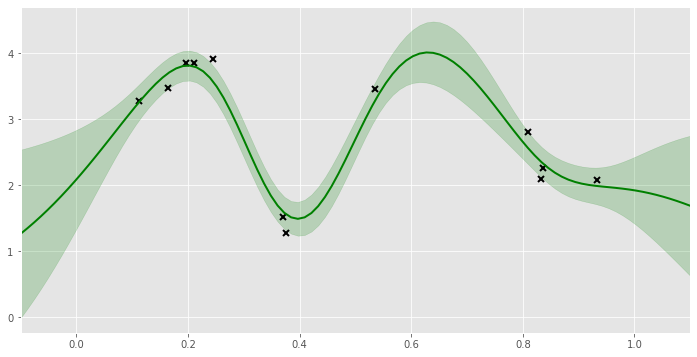

In [14]:
def plot(m, color):
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, color, lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color=color, alpha=0.2)
    plt.xlim(-0.1, 1.1)

In [ ]:
plot(m, 'green')

W0229 15:21:37.153411 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:21:40.669465 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:21:43.964888 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:21:47.196821 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:21:55.983713 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:21:59.557294 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:22:03.185530 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:22:06.714546 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:22:16.240031 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:22:20.029347 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:22:23.876027 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:22:27.705157 14468 logdensities.py:91] Shape 

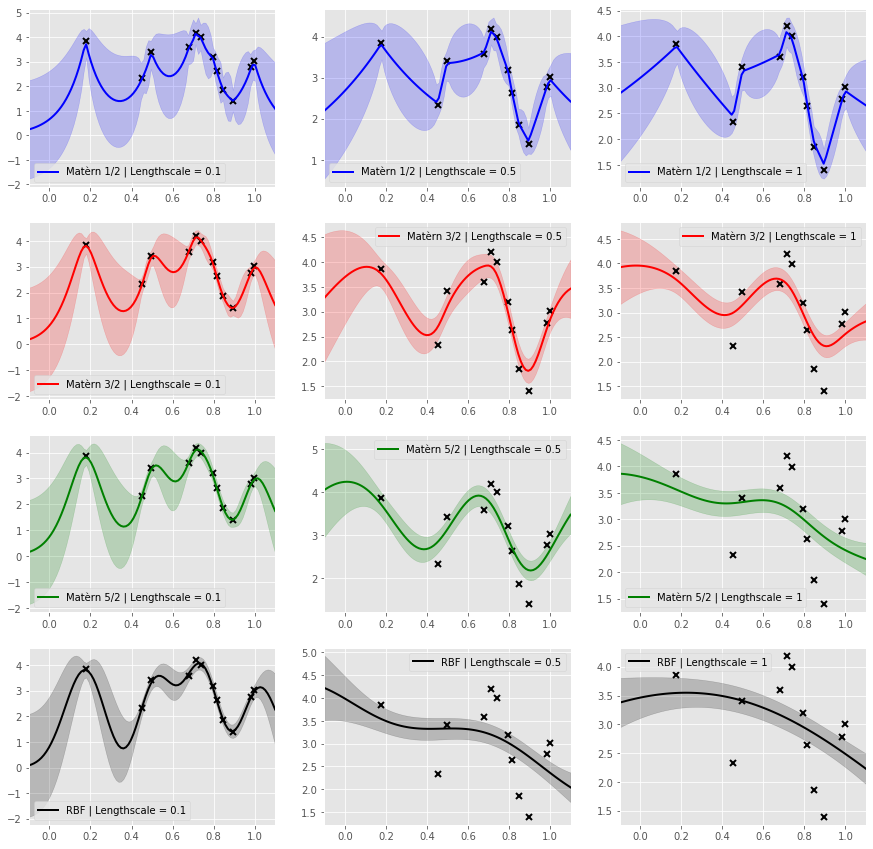

In [25]:
length_scales = [0.1,0.5,1]
fig, axs = plt.subplots(4, 3, figsize = (15,15))

for i, l in enumerate(length_scales):
    k12 = gpflow.kernels.Matern12(1, lengthscales=l)
    m12 = gpflow.models.GPR(X, Y, kern=k12)
    m12.likelihood.variance = 0.01
    m12.compile()
    k32 = gpflow.kernels.Matern32(1, lengthscales=l)
    m32 = gpflow.models.GPR(X, Y, kern=k32)
    m32.likelihood.variance = 0.01
    m32.compile()
    k52 = gpflow.kernels.Matern52(1, lengthscales=l)
    m52 = gpflow.models.GPR(X, Y, kern=k52)
    m52.likelihood.variance = 0.01
    m52.compile()
    krbf = gpflow.kernels.RBF(1, lengthscales=l)
    mrbf = gpflow.models.GPR(X, Y, kern=krbf)
    mrbf.likelihood.variance = 0.01
    mrbf.compile()
    
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean12, var12 = m12.predict_y(xx)
    mean32, var32 = m32.predict_y(xx)
    mean52, var52 = m52.predict_y(xx)
    meanrbf, varrbf = mrbf.predict_y(xx)
    
    axs[0,i].plot(X, Y, 'kx', mew=2)
    axs[1,i].plot(X, Y, 'kx', mew=2)
    axs[2,i].plot(X, Y, 'kx', mew=2)
    axs[3,i].plot(X, Y, 'kx', mew=2)
    
    axs[0,i].plot(xx, mean12, 'b', lw=2, label = "Matèrn 1/2 | Lengthscale = " + str(l))
    axs[1,i].plot(xx, mean32, 'r', lw=2, label = "Matèrn 3/2 | Lengthscale = " + str(l))
    axs[2,i].plot(xx, mean52, 'g', lw=2, label = "Matèrn 5/2 | Lengthscale = " + str(l))
    axs[3,i].plot(xx, meanrbf, 'black', lw=2, label = "RBF | Lengthscale = " + str(l))
    
    axs[0,i].fill_between(xx[:,0], mean12[:,0] - 2*np.sqrt(var12[:,0]), mean12[:,0] + 2*np.sqrt(var12[:,0]), color='blue', alpha=0.2)
    axs[1,i].fill_between(xx[:,0], mean32[:,0] - 2*np.sqrt(var32[:,0]), mean32[:,0] + 2*np.sqrt(var32[:,0]), color='red', alpha=0.2)
    axs[2,i].fill_between(xx[:,0], mean52[:,0] - 2*np.sqrt(var52[:,0]), mean52[:,0] + 2*np.sqrt(var52[:,0]), color='green', alpha=0.2)
    axs[3,i].fill_between(xx[:,0], meanrbf[:,0] - 2*np.sqrt(varrbf[:,0]), meanrbf[:,0] + 2*np.sqrt(varrbf[:,0]), color='black', alpha=0.2)
    
    axs[0,i].set_xlim(-0.1, 1.1)
    axs[1,i].set_xlim(-0.1, 1.1)
    axs[2,i].set_xlim(-0.1, 1.1)
    axs[3,i].set_xlim(-0.1, 1.1)
    
    axs[0,i].legend()
    axs[1,i].legend()
    axs[2,i].legend()
    axs[3,i].legend()
    
plt.savefig("KernelRegression.pdf")

W0229 15:34:42.202397 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:34:48.107590 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:34:53.912281 14468 logdensities.py:91] Shape of x must be 2D at computation.
W0229 15:34:59.507777 14468 logdensities.py:91] Shape of x must be 2D at computation.


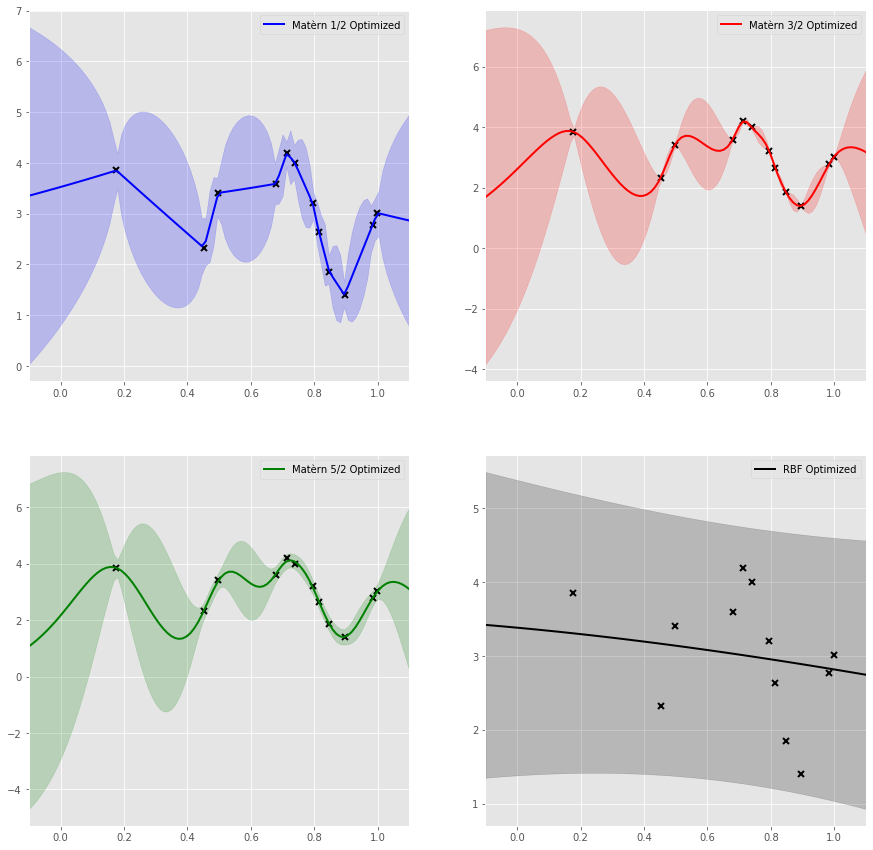

In [29]:
# Parameters tuned

l = 0.5
k12 = gpflow.kernels.Matern12(1, lengthscales=l)
m12 = gpflow.models.GPR(X, Y, kern=k12)
m12.likelihood.variance = 0.01
m12.compile()
k32 = gpflow.kernels.Matern32(1, lengthscales=l)
m32 = gpflow.models.GPR(X, Y, kern=k32)
m32.likelihood.variance = 0.01
m32.compile()
k52 = gpflow.kernels.Matern52(1, lengthscales=l)
m52 = gpflow.models.GPR(X, Y, kern=k52)
m52.likelihood.variance = 0.01
m52.compile()
krbf = gpflow.kernels.RBF(1, lengthscales=l)
mrbf = gpflow.models.GPR(X, Y, kern=krbf)
mrbf.likelihood.variance = 0.01
mrbf.compile()


gpflow.train.ScipyOptimizer().minimize(m12)
gpflow.train.ScipyOptimizer().minimize(m32)
gpflow.train.ScipyOptimizer().minimize(m52)
gpflow.train.ScipyOptimizer().minimize(mrbf)

xx = np.linspace(-0.1, 1.1, 100)[:,None]
mean12, var12 = m12.predict_y(xx)
mean32, var32 = m32.predict_y(xx)
mean52, var52 = m52.predict_y(xx)
meanrbf, varrbf = mrbf.predict_y(xx)

fig, axs = plt.subplots(2, 2, figsize = (15,15))

axs[0,0].plot(X, Y, 'kx', mew=2)
axs[0,1].plot(X, Y, 'kx', mew=2)
axs[1,0].plot(X, Y, 'kx', mew=2)
axs[1,1].plot(X, Y, 'kx', mew=2)

axs[0,0].plot(xx, mean12, 'b', lw=2, label = "Matèrn 1/2 Optimized")
axs[0,1].plot(xx, mean32, 'r', lw=2, label = "Matèrn 3/2 Optimized")
axs[1,0].plot(xx, mean52, 'g', lw=2, label = "Matèrn 5/2 Optimized")
axs[1,1].plot(xx, meanrbf, 'black', lw=2, label = "RBF Optimized")

axs[0,0].fill_between(xx[:,0], mean12[:,0] - 2*np.sqrt(var12[:,0]), mean12[:,0] + 2*np.sqrt(var12[:,0]), color='blue', alpha=0.2)
axs[0,1].fill_between(xx[:,0], mean32[:,0] - 2*np.sqrt(var32[:,0]), mean32[:,0] + 2*np.sqrt(var32[:,0]), color='red', alpha=0.2)
axs[1,0].fill_between(xx[:,0], mean52[:,0] - 2*np.sqrt(var52[:,0]), mean52[:,0] + 2*np.sqrt(var52[:,0]), color='green', alpha=0.2)
axs[1,1].fill_between(xx[:,0], meanrbf[:,0] - 2*np.sqrt(varrbf[:,0]), meanrbf[:,0] + 2*np.sqrt(varrbf[:,0]), color='black', alpha=0.2)

axs[0,0].set_xlim(-0.1, 1.1)
axs[0,1].set_xlim(-0.1, 1.1)
axs[1,0].set_xlim(-0.1, 1.1)
axs[1,1].set_xlim(-0.1, 1.1)

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
    
plt.savefig("KernelRegressionOptimized.pdf")

### Samples From Deep GP

In [4]:
import gpflow
import numpy as np
from matplotlib import pyplot as plt
import gpflow.kernels as ker
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [7]:
KExp = ker.RBF(1, lengthscale = 0.5)

In [8]:
Z= np.linspace(-1,1,1000)[:, None]

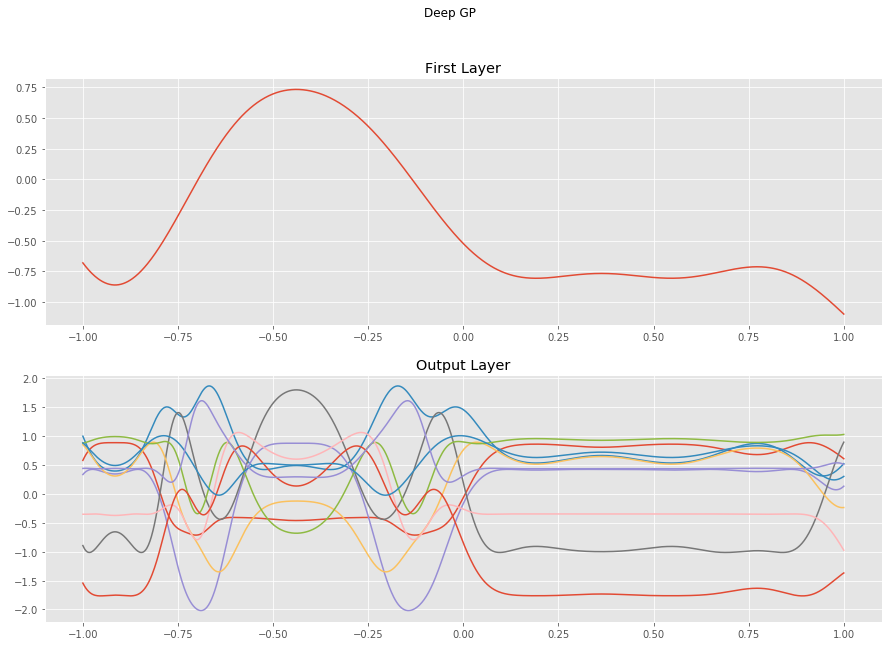

In [29]:
l = 0.3
var = 0.01

fig, axs = plt.subplots(2, 1, figsize = (15,10))

KExp1 = ker.RBF(1, lengthscale = l).K(Z)
X = np.random.multivariate_normal(np.zeros(1000), KExp1)

KExp2 = ker.RBF(1, lengthscale = l).K(X[:,None])
Y = np.random.multivariate_normal(np.zeros(1000), KExp2)

axs[0].plot(Z,X)
axs[0].set_title('First Layer')

for i in range(10):
    Y = np.random.multivariate_normal(np.zeros(1000), KExp2)
    axs[1].plot(Z,Y)
axs[1].set_title('Output Layer')

#plt.savefig("DeepGaussian.pdf")